• Create a chart to show how the relative share of various playlist_genres has changed over
time

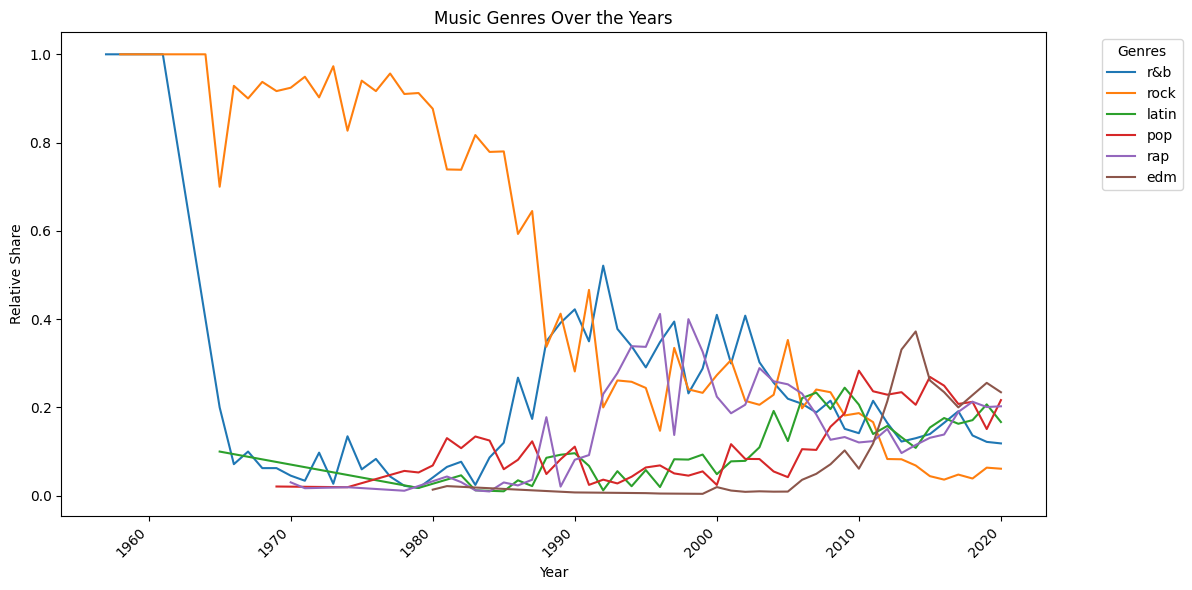

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


spotify_data = pd.read_csv('spotify_songs.csv')
spotify_data = spotify_data.drop(columns=["track_id", 'track_album_id', 'playlist_id', 'key'])
spotify_data = spotify_data.dropna()

spotify_data['track_album_release_date'] = pd.to_datetime(
    spotify_data['track_album_release_date'], format='%Y-%m-%d', errors='coerce'
)
spotify_data['year'] = spotify_data['track_album_release_date'].dt.year
spotify_data = spotify_data.dropna(subset=['year'])

df_years_genres = spotify_data.groupby(['year', 'playlist_genre']).size().reset_index(name='count')
df_years_genres['total_count_per_year'] = df_years_genres.groupby('year')['count'].transform('sum')
df_years_genres['relative_share'] = df_years_genres['count'] / df_years_genres['total_count_per_year']

plt.figure(figsize=(12, 6))
for genre in df_years_genres['playlist_genre'].unique():
    genre_data = df_years_genres[df_years_genres['playlist_genre'] == genre]
    plt.plot(genre_data['year'], genre_data['relative_share'], label=genre)

plt.xlabel("Year")
plt.ylabel("Relative Share")
plt.title("Music Genres Over the Years")
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

• Create a multiple line chart to show the evolution of the average song properties (only
those normalized in the range 0-1 ) over time

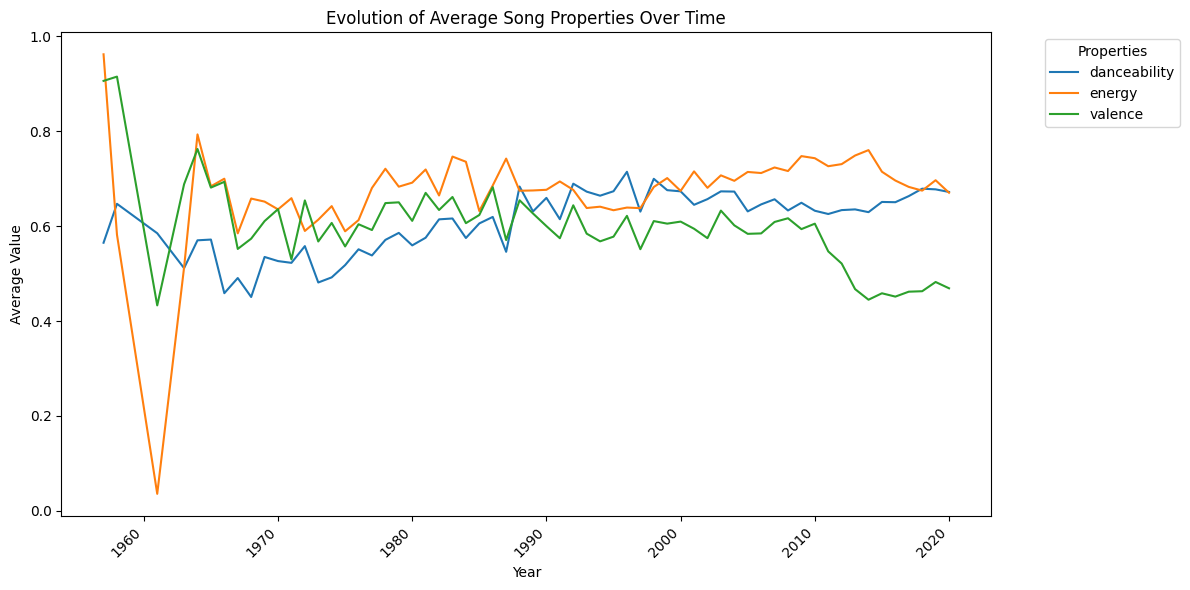

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

spotify_data = pd.read_csv('spotify_songs.csv')
spotify_data = spotify_data.drop(columns=["track_id", 'track_album_id', 'playlist_id', 'key'])
spotify_data = spotify_data.dropna()

spotify_data['track_album_release_date'] = pd.to_datetime(spotify_data['track_album_release_date'], format='%Y-%m-%d', errors='coerce')
spotify_data['year'] = spotify_data['track_album_release_date'].dt.year
spotify_data = spotify_data.dropna(subset=['year'])

properties_column = ['danceability', 'energy', 'year', 'valence']
spotify_data_properties = spotify_data[properties_column]

df_yearly_avg_properties = spotify_data_properties.groupby('year')[['danceability', 'energy', 'valence']].mean().reset_index()

plt.figure(figsize=(12, 6))
for column in ['danceability', 'energy', 'valence']:
    plt.plot(df_yearly_avg_properties['year'], df_yearly_avg_properties[column], label=column)

plt.xlabel("Year")
plt.ylabel("Average Value")
plt.title("Evolution of Average Song Properties Over Time")
plt.legend(title="Properties", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

• Create a small multiple chart with histograms of track popularity for the different genres.
Choose an optimal binning

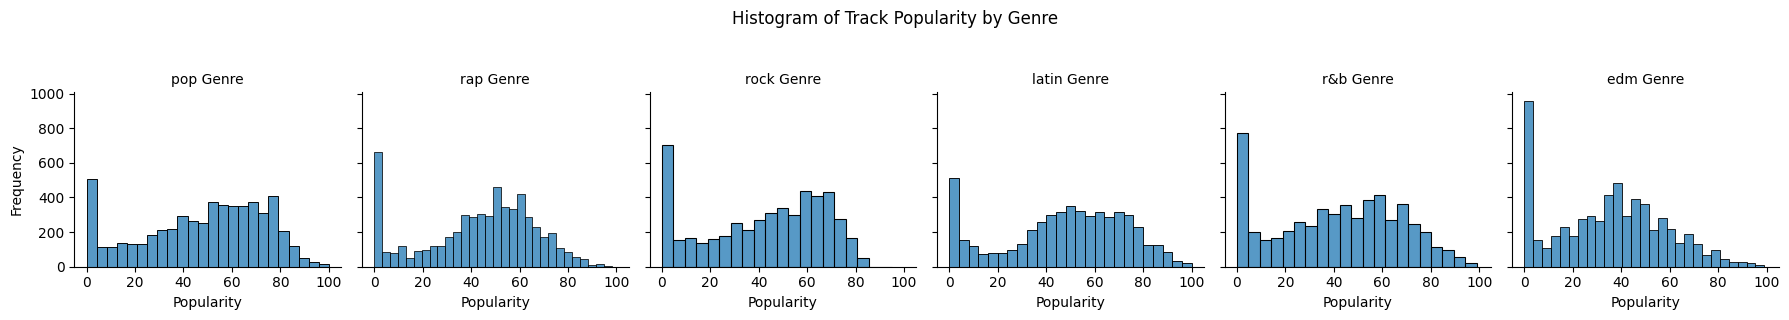

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

spotify_data = pd.read_csv('spotify_songs.csv')

spotify_data = spotify_data.drop(columns=["track_id", 'track_album_id', 'playlist_id', 'key'])
spotify_data = spotify_data.dropna()

g = sns.FacetGrid(spotify_data, col="playlist_genre")
g.map(sns.histplot, 'track_popularity', bins='auto')

g.set_axis_labels("Popularity", "Frequency")
g.set_titles("{col_name} Genre")
plt.suptitle("Histogram of Track Popularity by Genre", y=1.05)
plt.tight_layout()
plt.show()

• Compare the distributions of the average song duration for the different genres using a
visualization idiom for statistical analysis

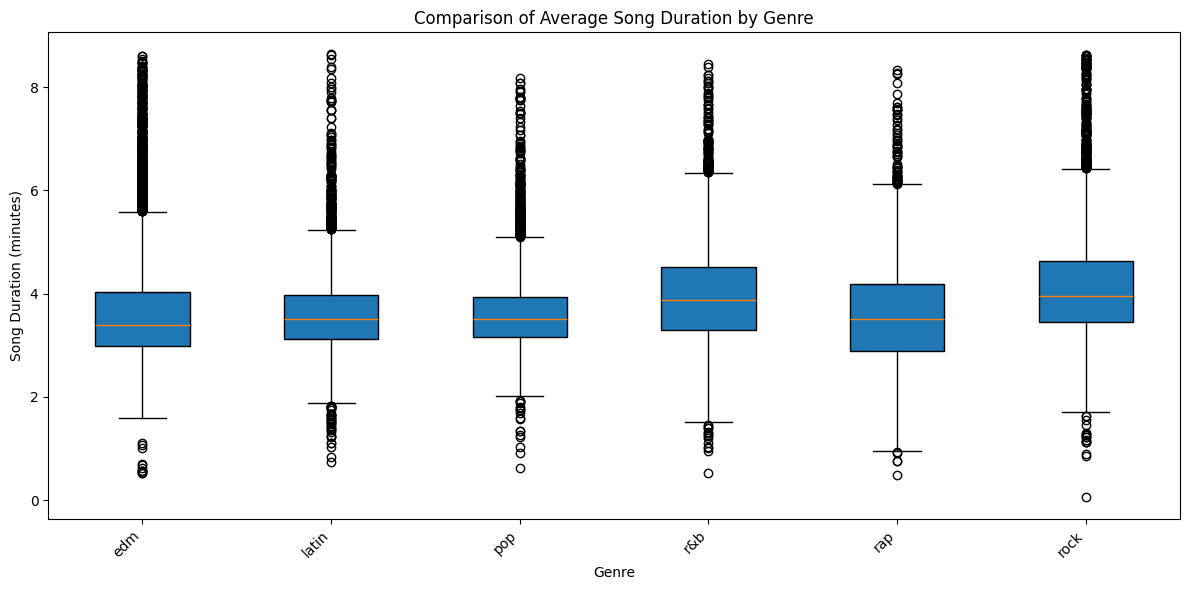

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


spotify_data = pd.read_csv('spotify_songs.csv')

spotify_data = spotify_data.drop(columns=["track_id", 'track_album_id', 'playlist_id', 'key'])
spotify_data = spotify_data.dropna()

spotify_data['duration_ms'] = spotify_data['duration_ms'] / 60000

genres_groups = spotify_data.groupby('playlist_genre')['duration_ms'].apply(list).reset_index(name='duration_list')

plt.figure(figsize=(12, 6))

plt.boxplot(genres_groups['duration_list'], labels=genres_groups['playlist_genre'], patch_artist=True)


plt.xlabel("Genre")
plt.ylabel("Song Duration (minutes)")
plt.title("Comparison of Average Song Duration by Genre")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

• Create a chart showing the how much the attributes (popularity, danceability, energy,
loudness, acousticness, instrumentalness, liveness, valence, tempo) are correlated. Use a
proper colormap.

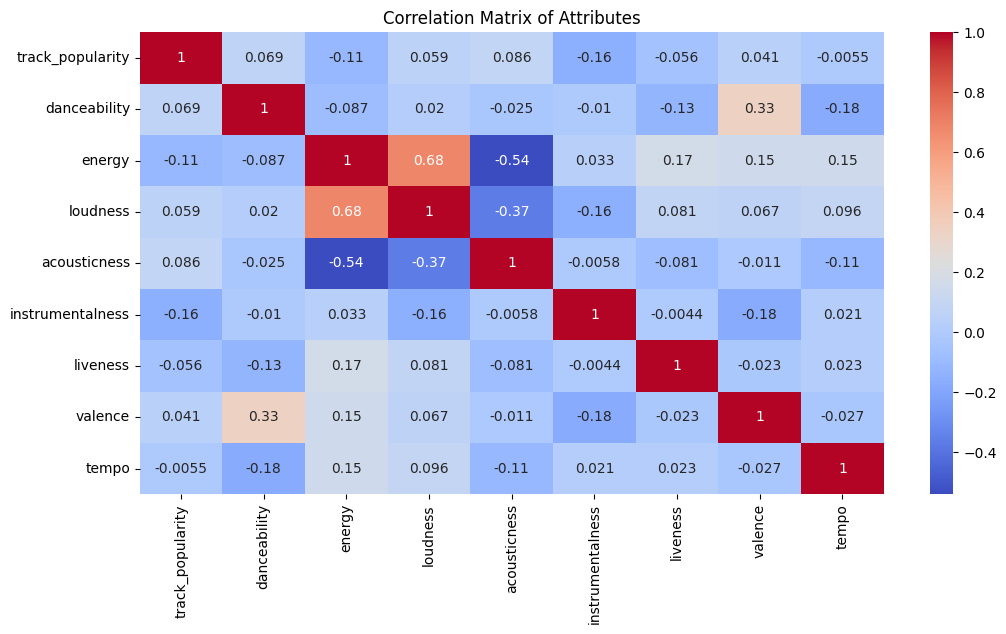

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

attributes = ['track_popularity', 'danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

correlation_matrix = spotify_data[attributes].corr()

plt.figure(figsize=(12, 6))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Attributes")
plt.show()


• extra task: visualize a scatter plot with songs released in 2010, representing
loudness and danceability on the x-y coordinates, dots colored by genres and
using a different mark (pre-attentive) to make a specific artist of your interest
evident.

<ipython-input-50-9d3dd8504346>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_data['track_album_release_date'] = pd.to_datetime(
<ipython-input-50-9d3dd8504346>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_data['year'] = spotify_data['track_album_release_date'].dt.year


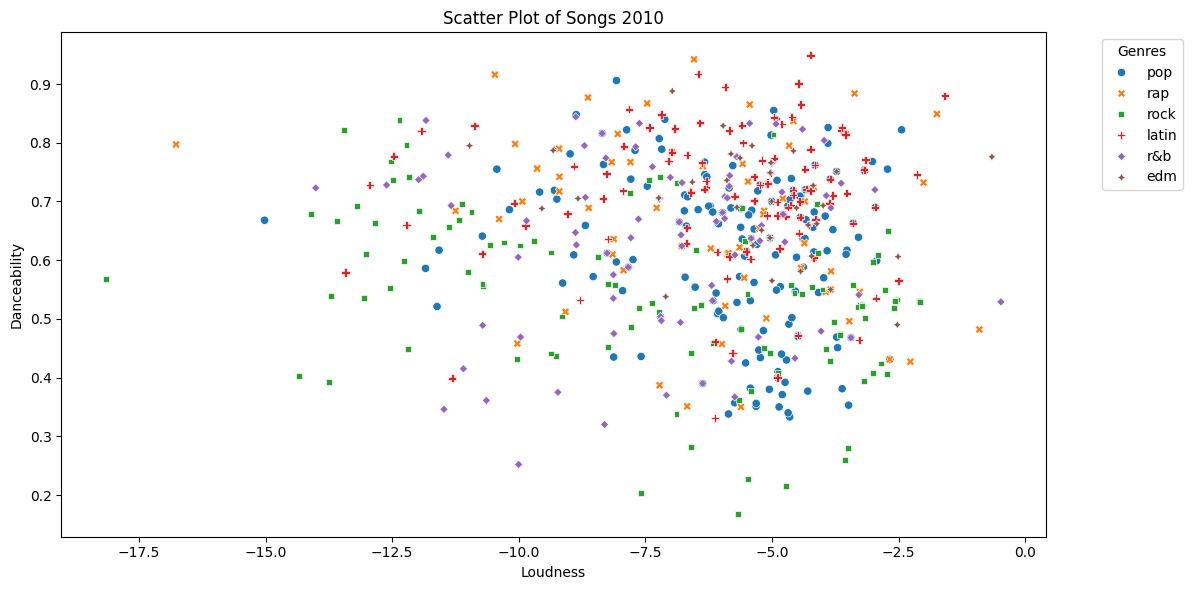

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

spotify_data = pd.read_csv('spotify_songs.csv')
] = spotify_data['track_album_release_date'].dt.year
spotify_data = spotify_data.dropna(subset=['year'])

spotify_data2010 = spotify_data[spotify_data['year'] == 2010]

spotify_data2010 = spotify_data2010[['loudness', 'danceability', 'playlist_genre', 'track_artist']]

plt.figure(figsize=(12, 6))

sns.scatterplot(data=spotify_data2010, x='loudness', y='danceability', hue='playlist_genre', style='playlist_genre')

spotify_data = spotify_data.drop(columns=["track_id", 'track_album_id', 'playlist_id', 'key'])
spotify_data = spotify_data.dropna()

spotify_data['track_album_release_date'] = pd.to_datetime(
    spotify_data['track_album_release_date'], format='%Y-%m-%d', errors='coerce'
)

spotify_data['year'
artist = 'Billie Eilish'
artist_data = spotify_data2010[spotify_data2010['track_artist'] == artist]

sns.scatterplot(data=artist_data, x='loudness', y='danceability', color='red', label=f'Artist: {artist}', s=300, marker='*')

plt.xlabel("Loudness")
plt.ylabel("Danceability")
plt.title("Scatter Plot of Songs 2010")
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
